<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Capstone/Capstone_MBA_Procedures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and load dataset

In [608]:
# Importing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [609]:
# Load claims breakdown by diagnosis
clm_icd = pd.read_csv('/content/CLM Breakdown csv.csv',usecols=['claimcode','icdno','cptno','sacode'])

In [610]:
# Load ICD table to get ICD category
icd_table = pd.read_excel('/content/icd_table.xlsx')

In [611]:
# Load claims table to get claim type
clm = pd.read_csv('/content/CLM DATA.csv',usecols=['CLAIM NO','CLAIM TYPE','SUBCLAIM TYPE'])

# Data Prep

In [612]:
clm_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382438 entries, 0 to 382437
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   claimcode  382438 non-null  int64
 1   icdno      382438 non-null  int64
 2   cptno      382438 non-null  int64
 3   sacode     382438 non-null  int64
dtypes: int64(4)
memory usage: 11.7 MB


In [613]:
# Check number of claims
clm_icd['claimcode'].nunique()

166993

In [614]:
icd_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   icdno        4343 non-null   int64 
 1   icdcategory  4343 non-null   int64 
 2   icdgroup     4343 non-null   int64 
 3   ICD CODE     4343 non-null   object
 4   ICD DISEASE  4343 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.8+ KB


In [615]:
clm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167064 entries, 0 to 167063
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CLAIM NO       167064 non-null  int64 
 1   CLAIM TYPE     167064 non-null  object
 2   SUBCLAIM TYPE  167064 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


In [616]:
# Rename CLAIM NO in clm to claimcode in preparation for merging
clm.rename(columns={"CLAIM NO": "claimcode"}, inplace=True)

# Convert claim code  into categorical data
clm['claimcode'] = clm['claimcode'].astype(str)

In [617]:
# Merge claims breakdown table and icd category table
claims = pd.merge(clm_icd, icd_table, on='icdno', how='left')

In [618]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382438 entries, 0 to 382437
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   claimcode    382438 non-null  int64  
 1   icdno        382438 non-null  int64  
 2   cptno        382438 non-null  int64  
 3   sacode       382438 non-null  int64  
 4   icdcategory  382355 non-null  float64
 5   icdgroup     382355 non-null  float64
 6   ICD CODE     382355 non-null  object 
 7   ICD DISEASE  382355 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ MB


# Drop claims with null ICD Category

In [619]:
claims.isnull().sum()

claimcode       0
icdno           0
cptno           0
sacode          0
icdcategory    83
icdgroup       83
ICD CODE       83
ICD DISEASE    83
dtype: int64

In [620]:
null_icd = claims[claims['icdcategory'].isnull()]
null_icd['claimcode'].nunique()

46

**46 claims do not have an ICD category**

In [621]:
# Drop null values
claims = claims.dropna()
claims.isnull().sum()

claimcode      0
icdno          0
cptno          0
sacode         0
icdcategory    0
icdgroup       0
ICD CODE       0
ICD DISEASE    0
dtype: int64

In [622]:
# Convert Claim code and ICD Category into categorical data
claims['claimcode'] = claims['claimcode'].astype(str)
claims['icdcategory'] = claims['icdcategory'].astype(int).astype(str)
claims['sacode'] = claims['sacode'].astype(int).astype(str)
claims['cptno'] = claims['cptno'].astype(int).astype(str)

# Filter claims with only 1 ICD category present

In [623]:
# Considering only claims 1 ICD category present
claims_icdsingle = claims.groupby('claimcode').filter(lambda x : x['claimcode'].shape[0]==1)
claims_icdsingle['claimcode'].value_counts().sum()

101140

In [624]:
claims_icdsingle.head()

,claimcode,icdno,cptno,sacode,icdcategory,icdgroup,ICD CODE,ICD DISEASE
0,203746,6127,0,3718,84,5007.0,G90.0,Idiopathic peripheral autonomic neuropathy
7,205599,12286,0,3718,124,5007.0,K21,Gastro-esophageal reflux disease
15,205787,76619,0,3812,104,4935.0,I10.9,Essential Hypertension; malignant hypertension
19,205848,20779,0,3952,164,5007.0,N03,Chronic nephritic syndrome
20,205852,20779,0,3952,164,5007.0,N03,Chronic nephritic syndrome


In [625]:
148095/166993

0.8868335798506525

**148l095 out of 166,993 or 88.68% of the claims has only 1 ICD category present.**

# Filter OP Claims

In [626]:
# Load ICD table to get ICD category
icd_desc = pd.read_csv('/content/icd_category_categorydes.csv')

# Convert icdcategory  into categorical data
icd_desc['icdcategory'] = icd_desc['icdcategory'].astype(int).astype(str)

In [627]:
# Merge the claims breakdown and main table to look up claim type
claims_icdsingle = pd.merge(claims_icdsingle, clm, on='claimcode', how='left')
claims_icdsingle.head()

,claimcode,icdno,cptno,sacode,icdcategory,icdgroup,ICD CODE,ICD DISEASE,CLAIM TYPE,SUBCLAIM TYPE
0,203746,6127,0,3718,84,5007.0,G90.0,Idiopathic peripheral autonomic neuropathy,OP,CONSULTATION
1,205599,12286,0,3718,124,5007.0,K21,Gastro-esophageal reflux disease,OP,CONSULTATION
2,205787,76619,0,3812,104,4935.0,I10.9,Essential Hypertension; malignant hypertension,OP,LAB AND DIAGNOSTIC
3,205848,20779,0,3952,164,5007.0,N03,Chronic nephritic syndrome,OP,DIAGNOSTIC AND CONSULTATION
4,205852,20779,0,3952,164,5007.0,N03,Chronic nephritic syndrome,OP,DIAGNOSTIC AND CONSULTATION


In [628]:
# Merge the claims breakdown and idc category description table
claims_icdsingle = pd.merge(claims_icdsingle, icd_desc, on='icdcategory', how='left')
claims_icdsingle.head()

,claimcode,icdno,cptno,sacode,icdcategory,icdgroup,ICD CODE,ICD DISEASE,CLAIM TYPE,SUBCLAIM TYPE,ICD CATEGORY
0,203746,6127,0,3718,84,5007.0,G90.0,Idiopathic peripheral autonomic neuropathy,OP,CONSULTATION,Other disorders of the nervous system (G89-G99)
1,205599,12286,0,3718,124,5007.0,K21,Gastro-esophageal reflux disease,OP,CONSULTATION,"Diseases of esophagus, stomach and duodenum (K..."
2,205787,76619,0,3812,104,4935.0,I10.9,Essential Hypertension; malignant hypertension,OP,LAB AND DIAGNOSTIC,Hypertensive diseases (I10-I15)
3,205848,20779,0,3952,164,5007.0,N03,Chronic nephritic syndrome,OP,DIAGNOSTIC AND CONSULTATION,Glomerular diseases (N00-N08)
4,205852,20779,0,3952,164,5007.0,N03,Chronic nephritic syndrome,OP,DIAGNOSTIC AND CONSULTATION,Glomerular diseases (N00-N08)


In [629]:
# Filter OP claims
claims_op = claims_icdsingle[(claims_icdsingle['CLAIM TYPE']=='OP') & (claims_icdsingle['SUBCLAIM TYPE'] != 'ANNUAL PHYSICAL EXAMINATION') & (claims_icdsingle['SUBCLAIM TYPE'] != 'APE')]
claims_op.head()

,claimcode,icdno,cptno,sacode,icdcategory,icdgroup,ICD CODE,ICD DISEASE,CLAIM TYPE,SUBCLAIM TYPE,ICD CATEGORY
0,203746,6127,0,3718,84,5007.0,G90.0,Idiopathic peripheral autonomic neuropathy,OP,CONSULTATION,Other disorders of the nervous system (G89-G99)
1,205599,12286,0,3718,124,5007.0,K21,Gastro-esophageal reflux disease,OP,CONSULTATION,"Diseases of esophagus, stomach and duodenum (K..."
2,205787,76619,0,3812,104,4935.0,I10.9,Essential Hypertension; malignant hypertension,OP,LAB AND DIAGNOSTIC,Hypertensive diseases (I10-I15)
3,205848,20779,0,3952,164,5007.0,N03,Chronic nephritic syndrome,OP,DIAGNOSTIC AND CONSULTATION,Glomerular diseases (N00-N08)
4,205852,20779,0,3952,164,5007.0,N03,Chronic nephritic syndrome,OP,DIAGNOSTIC AND CONSULTATION,Glomerular diseases (N00-N08)


In [630]:
claims_op[claims_op['CLAIM TYPE'] == 'APE']

,claimcode,icdno,cptno,sacode,icdcategory,icdgroup,ICD CODE,ICD DISEASE,CLAIM TYPE,SUBCLAIM TYPE,ICD CATEGORY


# Get most claimed ICD Categories

In [631]:
# Get most frequently claimed ICD Categories
claims_count = pd.DataFrame(claims_op['ICD CATEGORY'].value_counts().sort_values(ascending=False).head(5).reset_index())
claims_count

,index,ICD CATEGORY
0,Hypertensive diseases (I10-I15),9384
1,Diabetes mellitus (E08-E13),4148
2,Metabolic disorders (E70-E88),3685
3,Other soft tissue disorders (M70-M79),3295
4,Other diseases of the urinary system (N30-N39),3191


In [632]:
# Rename columns
claims_count.rename(columns={"ICD CATEGORY":'claim_count',"index": "ICD Category Description"}, inplace=True)
claims_count

,ICD Category Description,claim_count
0,Hypertensive diseases (I10-I15),9384
1,Diabetes mellitus (E08-E13),4148
2,Metabolic disorders (E70-E88),3685
3,Other soft tissue disorders (M70-M79),3295
4,Other diseases of the urinary system (N30-N39),3191


Text(0, 0.5, 'Number of Claims')

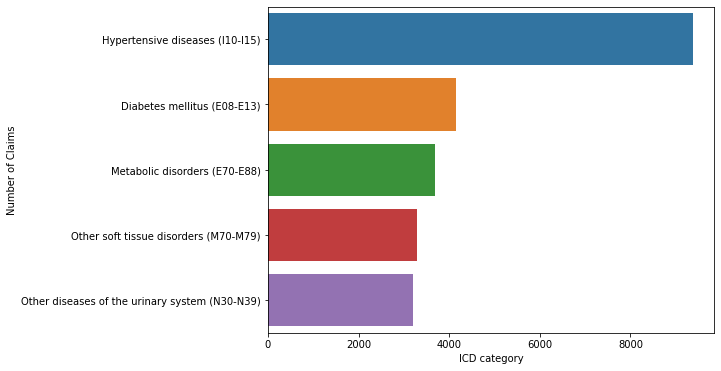

In [633]:
# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(x='claim_count', y='ICD Category Description',data=claims_count)
ax.set_xlabel('ICD category')
ax.set_ylabel('Number of Claims')

# Check procedures for ICD Category 54: Diabetes mellitus (E08-E13)

In [634]:
# Load SA table
sa_table = pd.read_excel('/content/sa_table.xlsx')

# Convert SA Code to categorical
sa_table['sacode'] = sa_table['sacode'].astype(int).astype(str)

# Merge OP Claims with SA table to get SA Description
procedures_basket = pd.merge(claims_op, sa_table, on='sacode', how='left')

procedures_basket = procedures_basket[['claimcode', 'icdcategory', 'ICD CATEGORY', 'sacode', 'SA DESCRIPTION','cptno']]
procedures_diabetes = procedures_basket[procedures_basket['icdcategory']=='54']
procedures_diabetes

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno
88,212388,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
91,212406,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
98,212586,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
132,213298,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
137,213660,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
...,...,...,...,...,...,...
90176,616091,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
90190,623886,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
90199,624012,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0
90249,643589,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0


In [635]:
# Load CPT table
cpt_table = pd.read_excel('/content/cpt_table.xlsx')

# Conver cptno to categorical
cpt_table['cptno'] = cpt_table['cptno'].astype(int).astype(str)

# Merge to get CPT of SA code=0
procedures_diabetes = pd.merge(procedures_diabetes, cpt_table, on='cptno', how='left')
procedures_diabetes = procedures_diabetes.drop(columns='CPT SECTION')

# Fill NaN
procedures_diabetes['SA DESCRIPTION'] = procedures_diabetes['SA DESCRIPTION'].fillna(procedures_diabetes['CPT DESCRIPTION'])
procedures_diabetes

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,CPT DESCRIPTION
0,212388,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
1,212406,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
2,212586,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
3,213298,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
4,213660,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
...,...,...,...,...,...,...,...
4143,616091,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
4144,623886,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
4145,624012,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN
4146,643589,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN


In [636]:
# Removing duplicate procedures in claims, since we are only looking at the occurence of the procedure per claim
procedures_diabetes['claims_sa'] = procedures_diabetes[['claimcode', 'SA DESCRIPTION']].agg('_'.join, axis=1)
procedures_diabetes = procedures_diabetes.drop_duplicates(subset='claims_sa')
procedures_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 4147
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   claimcode        4148 non-null   object
 1   icdcategory      4148 non-null   object
 2   ICD CATEGORY     4148 non-null   object
 3   sacode           4148 non-null   object
 4   SA DESCRIPTION   4148 non-null   object
 5   cptno            4148 non-null   object
 6   CPT DESCRIPTION  12 non-null     object
 7   claims_sa        4148 non-null   object
dtypes: object(8)
memory usage: 291.7+ KB


In [637]:
procedures_diabetes

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,CPT DESCRIPTION,claims_sa
0,212388,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,212388_CONSULTATION
1,212406,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,212406_CONSULTATION
2,212586,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,212586_CONSULTATION
3,213298,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,213298_CONSULTATION
4,213660,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,213660_CONSULTATION
...,...,...,...,...,...,...,...,...
4143,616091,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,616091_CONSULTATION
4144,623886,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,623886_CONSULTATION
4145,624012,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,624012_CONSULTATION
4146,643589,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,NaN,643589_CONSULTATION


In [638]:
procedures_diabetes['claimcode'].value_counts().sort_values(ascending=False)

212388    1
223105    1
218241    1
215937    1
212586    1
         ..
615848    1
616074    1
616075    1
616091    1
644122    1
Name: claimcode, Length: 4148, dtype: int64

In [639]:
# Get list Procedures by Claim number
transactions = procedures_diabetes.groupby('claimcode').agg(lambda col: ','.join(col)).reset_index()
transactions.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,claims_sa
0,212388,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,212388_CONSULTATION
1,212406,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,212406_CONSULTATION
2,212586,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,212586_CONSULTATION
3,213298,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,213298_CONSULTATION
4,213660,54,Diabetes mellitus (E08-E13),3718,CONSULTATION,0,213660_CONSULTATION


# Check procedures for ICD Category 104: Hypertensive (I10-I15)

In [640]:
# Load SA table
sa_table = pd.read_excel('/content/sa_table.xlsx')

# Convert SA Code to categorical
sa_table['sacode'] = sa_table['sacode'].astype(int).astype(str)

# Merge OP Claims with SA table to get SA Description
procedures_basket = pd.merge(claims_op, sa_table, on='sacode', how='left')

procedures_basket = procedures_basket[['claimcode', 'icdcategory', 'ICD CATEGORY', 'sacode', 'SA DESCRIPTION','cptno']]
procedures_soft = procedures_basket[procedures_basket['icdcategory']=='104']
procedures_soft

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno
2,205787,104,Hypertensive diseases (I10-I15),3812,LABORATORY-MICROSCOPY,0
11,207028,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0
49,210501,104,Hypertensive diseases (I10-I15),3816,2D-ECHO,0
52,211087,104,Hypertensive diseases (I10-I15),3821,ECG,0
60,211216,104,Hypertensive diseases (I10-I15),3803,LABORATORY-CHEMISTRY,0
...,...,...,...,...,...,...
90208,624120,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0
90224,629248,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0
90258,647057,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0
90259,647137,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0


In [641]:
# Load CPT table
cpt_table = pd.read_excel('/content/cpt_table.xlsx')

# Conver cptno to categorical
cpt_table['cptno'] = cpt_table['cptno'].astype(int).astype(str)

# Merge to get CPT of SA code=0
procedures_soft = pd.merge(procedures_soft, cpt_table, on='cptno', how='left')
procedures_soft = procedures_soft.drop(columns='CPT SECTION')

# Fill NaN
procedures_soft['SA DESCRIPTION'] = procedures_soft['SA DESCRIPTION'].fillna(procedures_soft['CPT DESCRIPTION'])
procedures_soft

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,CPT DESCRIPTION
0,205787,104,Hypertensive diseases (I10-I15),3812,LABORATORY-MICROSCOPY,0,NaN
1,207028,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN
2,210501,104,Hypertensive diseases (I10-I15),3816,2D-ECHO,0,NaN
3,211087,104,Hypertensive diseases (I10-I15),3821,ECG,0,NaN
4,211216,104,Hypertensive diseases (I10-I15),3803,LABORATORY-CHEMISTRY,0,NaN
...,...,...,...,...,...,...,...
9379,624120,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN
9380,629248,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN
9381,647057,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN
9382,647137,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN


In [642]:
# Removing duplicate procedures in claims, since we are only looking at the occurence of the procedure per claim
procedures_soft['claims_sa'] = procedures_soft[['claimcode', 'SA DESCRIPTION']].agg('_'.join, axis=1)
procedures_soft = procedures_soft.drop_duplicates(subset='claims_sa')
procedures_soft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9384 entries, 0 to 9383
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   claimcode        9384 non-null   object
 1   icdcategory      9384 non-null   object
 2   ICD CATEGORY     9384 non-null   object
 3   sacode           9384 non-null   object
 4   SA DESCRIPTION   9384 non-null   object
 5   cptno            9384 non-null   object
 6   CPT DESCRIPTION  82 non-null     object
 7   claims_sa        9384 non-null   object
dtypes: object(8)
memory usage: 659.8+ KB


In [643]:
procedures_soft

,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,CPT DESCRIPTION,claims_sa
0,205787,104,Hypertensive diseases (I10-I15),3812,LABORATORY-MICROSCOPY,0,NaN,205787_LABORATORY-MICROSCOPY
1,207028,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN,207028_CONSULTATION
2,210501,104,Hypertensive diseases (I10-I15),3816,2D-ECHO,0,NaN,210501_2D-ECHO
3,211087,104,Hypertensive diseases (I10-I15),3821,ECG,0,NaN,211087_ECG
4,211216,104,Hypertensive diseases (I10-I15),3803,LABORATORY-CHEMISTRY,0,NaN,211216_LABORATORY-CHEMISTRY
...,...,...,...,...,...,...,...,...
9379,624120,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN,624120_CONSULTATION
9380,629248,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN,629248_CONSULTATION
9381,647057,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN,647057_CONSULTATION
9382,647137,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,NaN,647137_CONSULTATION


In [644]:
procedures_soft['claimcode'].value_counts().sort_values(ascending=False)

205787    1
214387    1
214538    1
214459    1
214425    1
         ..
624119    1
624120    1
629248    1
647057    1
653907    1
Name: claimcode, Length: 9384, dtype: int64

In [645]:
# Get list Procedures by Claim number
transactions = procedures_soft.groupby('claimcode').agg(lambda col: ','.join(col)).reset_index()
transactions.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,claimcode,icdcategory,ICD CATEGORY,sacode,SA DESCRIPTION,cptno,claims_sa
0,205787,104,Hypertensive diseases (I10-I15),3812,LABORATORY-MICROSCOPY,0,205787_LABORATORY-MICROSCOPY
1,207028,104,Hypertensive diseases (I10-I15),3718,CONSULTATION,0,207028_CONSULTATION
2,210501,104,Hypertensive diseases (I10-I15),3816,2D-ECHO,0,210501_2D-ECHO
3,211087,104,Hypertensive diseases (I10-I15),3821,ECG,0,211087_ECG
4,211216,104,Hypertensive diseases (I10-I15),3803,LABORATORY-CHEMISTRY,0,211216_LABORATORY-CHEMISTRY
